In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-03-31 13:12:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  7,70MB/s    in 0,2s    

2023-03-31 13:12:31 (7,70 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *

In [120]:
df = pd.read_csv("housing.csv")

In [121]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [122]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

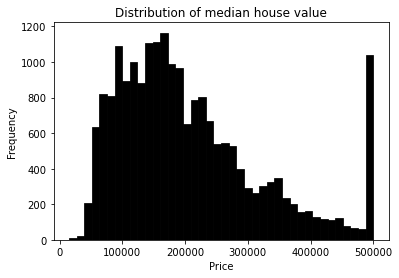

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

plt.show()

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

The median house value have a long tail.

In [123]:
df_temp = df[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']]

### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

### Ans = The feature with missing values is total_bedrooms and there are totally 207 missing values

In [12]:
df_temp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

### Ans: The median for variable 'population' is 1166.

In [13]:
df_temp.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [14]:
np.random.seed(42)

n = len(df_temp)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_temp.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

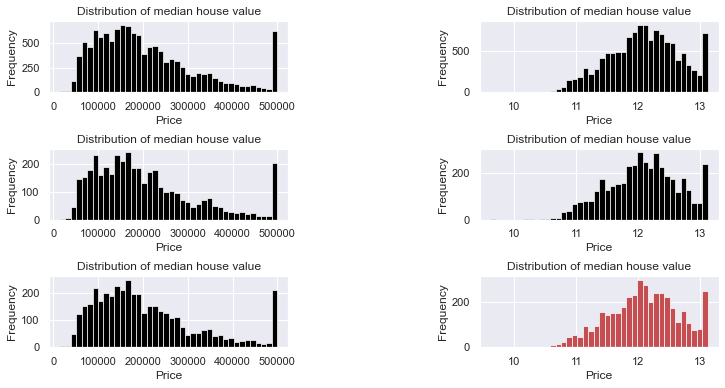

In [27]:
sns.set(rc={"figure.figsize": (12, 6)})

subplot(3,2,1)
ax = sns.histplot(y_train_orig, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplot(3,2,2)
ax = sns.histplot(y_train, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplot(3,2,3)
ax = sns.histplot(y_val_orig, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplot(3,2,4)
ax = sns.histplot(y_val, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplot(3,2,5)
ax = sns.histplot(y_test_orig, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplot(3,2,6)
ax = sns.histplot(y_test, bins=40, color='r', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house value')

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)
plt.show()

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

### Fill the missing values with 0

In [81]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [82]:
def prepare_X(df, fill_mv):
    print("Fill missing values with:",fill_mv)
    df['total_bedrooms'] = df['total_bedrooms'].fillna(fill_mv)
    X = df.values
    return X

In [83]:
X_train = prepare_X(df_train, fill_mv=0)
w_0, w = train_linear_regression(X_train, y_train)

Fill missing values with: 0


In [84]:
y_pred = w_0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

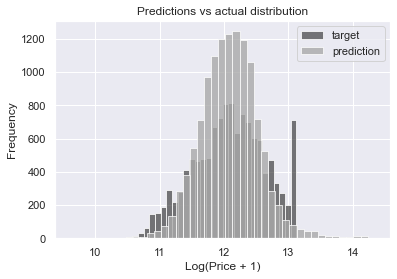

In [85]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [86]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [87]:
round(rmse(y_train, y_pred), 2)

0.34

In [89]:
X_val = prepare_X(df_val, fill_mv=0)
y_pred = w_0 + X_val.dot(w)

Fill missing values with: 0


In [90]:
round(rmse(y_val, y_pred),2)

0.33

### Fill the missing values with mean of the "total_bedrooms" variables

In [91]:
X_train = prepare_X(df_train, fill_mv=df_train.total_bedrooms.mean())
w_0, w = train_linear_regression(X_train, y_train)

Fill missing values with: 524.5631459948321


In [92]:
y_pred = w_0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

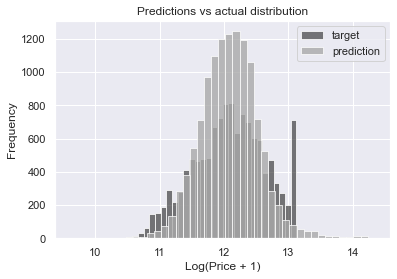

In [93]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [94]:
round(rmse(y_train, y_pred), 2)

0.34

In [95]:
X_val = prepare_X(df_val, fill_mv=df_train.total_bedrooms.mean())
y_pred = w_0 + X_val.dot(w)

Fill missing values with: 524.5631459948321


In [96]:
round(rmse(y_val, y_pred), 2)

0.33

If we fill the missing values of total_bedroom variable value 

With 0:<br>
The rmse for rmse(y_train, y_pred) = 0.34<br>
The rmse for rmse(y_val, y_pred) = 0.33<br>

With mean:<br>
The rmse for rmse(y_train, y_pred) = 0.34<br>
The rmse for rmse(y_val, y_pred) = 0.33<br>

Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

### Ans: 0

In [97]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [110]:
X_train = prepare_X(df_train, fill_mv=0)
X_val = prepare_X(df_val, fill_mv=0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

Fill missing values with: 0
Fill missing values with: 0
     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

## $$ Ans \approx 0.005 $$

In [153]:
root_mean_square_error = []
print(df_temp.isnull().sum())
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(seed)

    n = len(df_temp)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_temp.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)
        
        return w[0], w[1:]

    def prepare_X(df, fill_mv):
        df['total_bedrooms'] = df['total_bedrooms'].fillna(fill_mv)
        X = df.values
        return X

    X_train = prepare_X(df_train, fill_mv=0)
    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_train.dot(w)

    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)

    # RMSE for training data
    round(rmse(y_train, y_pred), 3)

    # RMSE for validation data
    X_val = prepare_X(df_val, fill_mv=0)
    y_pred = w_0 + X_val.dot(w)

    root_mean_square_error.append(rmse(y_val, y_pred))
    # print(y_val[:5], y_pred[:5])
    
    print("RMSE score on validation dataset for seed of %d is: %f"% (seed, round(rmse(y_val, y_pred),3)))

print(root_mean_square_error)
print("The standard deviation of the RMSE score is :", round(np.std(root_mean_square_error), 3))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64
RMSE score on validation dataset for seed of 0 is: 0.339000
RMSE score on validation dataset for seed of 1 is: 0.336000
RMSE score on validation dataset for seed of 2 is: 0.332000
RMSE score on validation dataset for seed of 3 is: 0.341000
RMSE score on validation dataset for seed of 4 is: 0.339000
RMSE score on validation dataset for seed of 5 is: 0.343000
RMSE score on validation dataset for seed of 6 is: 0.345000
RMSE score on validation dataset for seed of 7 is: 0.340000
RMSE score on validation dataset for seed of 8 is: 0.347000
RMSE score on validation dataset for seed of 9 is: 0.337000
[0.3388430480528556, 0.3362387255956056, 0.33209123188279116, 0.34051536090384843, 0.3389024066573923, 0.34348667257195103, 0.3451980953100708, 0.3395989

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

## $$ Ans \approx 0.35 $$

In [154]:
root_mean_square_error = []
print(df_temp.isnull().sum())
for seed in [9]:

    np.random.seed(seed)

    n = len(df_temp)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_temp.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    temp = [df_train, df_val]

    df_train = pd.concat(temp)

    y_train = np.concatenate((y_train, y_val), axis=0)

    def train_linear_regression_reg(X, y, r=0.001):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        reg = r * np.eye(XTX.shape[0])
        XTX = XTX + reg

        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)
        
        return w[0], w[1:]

    def prepare_X(df, fill_mv):
        df['total_bedrooms'] = df['total_bedrooms'].fillna(fill_mv)
        X = df.values
        return X

    X_train = prepare_X(df_train, fill_mv=0)
    w_0, w = train_linear_regression_reg(X_train, y_train)

    y_pred = w_0 + X_train.dot(w)

    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)

    # RMSE for training data
    round(rmse(y_train, y_pred), 3)

    # RMSE for test data
    X_val = prepare_X(df_test, fill_mv=0)
    y_pred = w_0 + X_val.dot(w)

    # print(y_val[:5], y_pred[:5])
    
    print("RMSE score on validation dataset for seed of %d is: %f"% (seed, rmse(y_test, y_pred)))


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64
RMSE score on validation dataset for seed of 9 is: 0.345317
